# Case Study: How Can a Wellness Technology Company Play It Smart?

## Background
This is the capstone project for the Google Data Anlytics Professional Certificate.
The scenario is that I will act as a junior data analyst working for the marketing analyst team at Bellabeat. Bellabeat is a a high-tech manufacturer of health-focused products for women. The goal is to make insights from analysing data from smart devices and apply these insights guide Bellabeat marketing strategy. 

### The Business model Belleat
Bellabeat provide 4 types of products:
1. Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
2. Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
3. Time: A wellness watch combing the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide user with insights into their daily wellness.
4. Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that user are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track uers' hydration levels.
5. Bellabeat membership: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

From the product list, revenue is mainly generated through the sales of tracker devices and Bellabeat membership subscription program. 

## Ask Phase
### Guiding Question:
1. What data is provided?
2. Given the data provided, are there any trends that could be identified?
3. Are those trends applicable to Bellabeat's strategy?
4. Who are the target audience of this analysis and how would they benefit?

A public dataset of [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) provided by [Möbius](https://www.kaggle.com/arashnic) will be used. 

The major stakeholder is the Chief Creative Officer of Bellabeat, the executive team, the user and clients of the company. Other stakeholders would include employees of the company.

This analysis will be shared to the executive team, helping them to formulate marketing ideas and strategies.
The goal of the analysis is to identify if there are any insights from this dataset which could be applicable on Bellabeat market strategy.

## Prepare Phase

In this project, we will use R to analyse the data. We will first download and load the package `tidyverse` .

`library(tidyverse)` will load the core tidyverse packages:
* ggplot2, for data visualisati nate/times.
* dplyr, for data manipulation.
* tidyr, for data tidying.
* readr, for data import.
* purrr, for functional programming.
* tibble, for tibbles, a modern re-imagining of data frames.
* stringr, for strings.
* forcats, for factors.
* lubridate, for date/times.times..


In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### About the data
The dataset given is generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. The data license is CC0: Public Domain. The dataset is separated into two periods. The first period is from March 12 to April 11, 2016. The second period is from April 12 to May 12, 2016.

In [ ]:
# Import the activity_data 
options(readr.show_col_types = FALSE)
daily_activity1<-read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")
daily_activity2<-read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

In [8]:
# Let's have a look on daily_activity1 and daily_activity1
head(daily_activity1)
head(daily_activity2)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


They have the same data structure and fields. But they have different no of unique Id(ie.users), illustrate as below

In [9]:
n_distinct(daily_activity1$Id)
n_distinct(daily_activity2$Id)


[1] 35

[1] 33

The numbers are inconsistent with the 30 eligible Fitbit users as stated in [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)

Let's examine the number of users on each day to see whether the sampling are consitent between the two periods


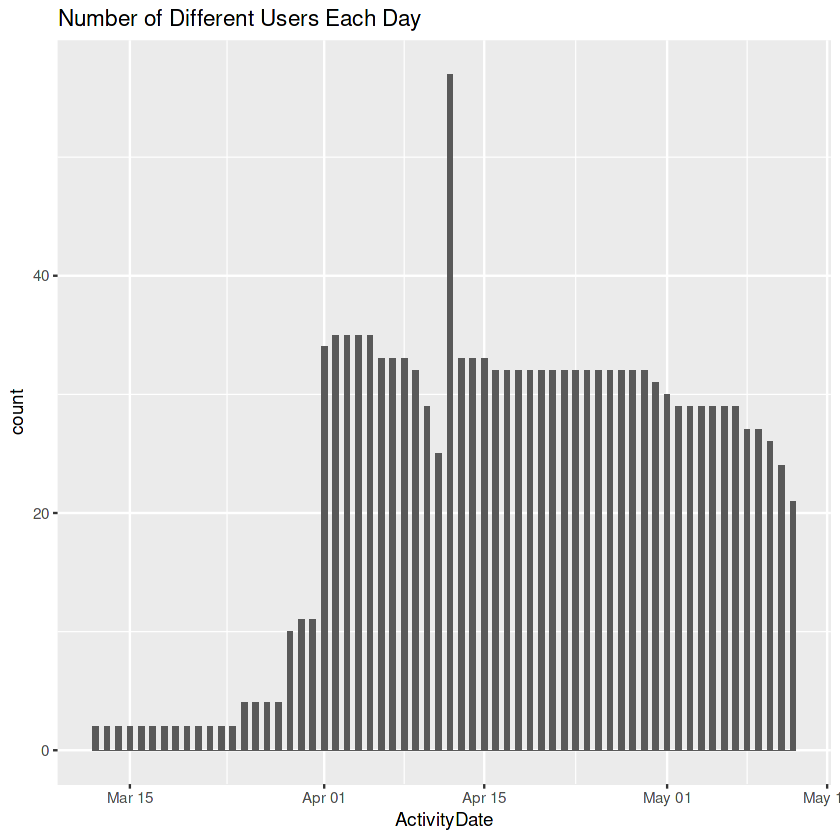

In [12]:
#combine the separated data
daily_activity <- bind_rows(daily_activity1, daily_activity2)

#Cleaning the data
daily_activity <- daily_activity %>%
    mutate(ActivityDate = mdy(ActivityDate)) %>%
    drop_na() %>%
    filter(!duplicated(daily_activity)) %>%
    arrange(ActivityDate)

#Create a histogram, showing the no of different users registered on each date
daily_activity_bp = ggplot(data = daily_activity) +
    geom_histogram(mapping = aes(x = ActivityDate), binwidth = 0.5) + labs(title="Number of Different Users Each Day")
daily_activity_bp

From the above histogram, the no of users registered after April 1 is significant more than those before April 1. Apparently, the sampling from first period might not be homogenous with the sampling in the second period.

Moreover, on April 12, the number of registered users are significant higher than those in other dates. Given April 12 is the first date of the second period, we can suspect there is data overlapped on April 12.

Therefore, we will only use the data from the second period.

## Process Phase
We will use the the data from minuteSleep_merged.csv, sleepDay_merged.csv and dailyActivity_merged.csv

In [38]:
# Import the data only in the second period
options(readr.show_col_types = FALSE)
daily_activity<- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepminute <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
sleepday <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

In [39]:
# Cleaing the data
activity <- daily_activity %>%
    mutate(ActivityDate = mdy(ActivityDate)) %>%
    mutate(Id = as.character(Id)) %>%
    drop_na() %>%
# Assuming zero steps mean not exercising and filter out from the data entry. 
    filter(TotalSteps != 0) %>%
    distinct() 


sleepday_data <- sleepday %>%
    mutate(Id = as.character(Id)) %>%
    mutate(SleepDay = mdy_hms(SleepDay))%>%
    drop_na() %>%
    distinct()

sleepminute_data <- sleepminute %>%
    mutate(date = mdy_hms(date)) %>%
    mutate(Id = as.character(Id)) %>%
    rename(datetime = date) %>%
    drop_na()

In [17]:
# how many different "Id" and days are involved during the period 
n_distinct(activity$Id)
n_distinct(activity$ActivityDate)

[1] 33

[1] 31

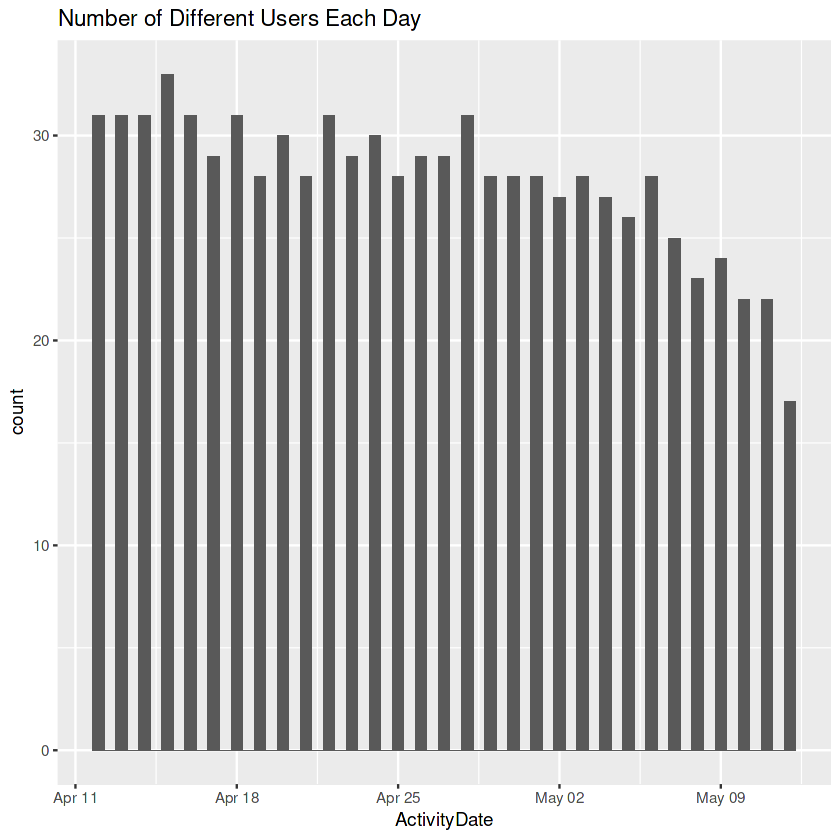

In [18]:
#Check the distribution of the number of distinct ids each day
no_of_id_by_date <- activity %>%
    group_by(ActivityDate) %>%
    summarise(count = n())


#the following shows the distribution of user activities 
daily_activity_bp = ggplot(data = activity) +
    geom_histogram(mapping = aes(x = ActivityDate), binwidth = 0.5) + labs(title="Number of Different Users Each Day")
daily_activity_bp


The number of people exercising was wearing off towards the sampling period

## Analysis Phase

### Exercise and Sleep Quality
Let examine the relationship between exercising and sleeping. In the sleepminute dataset, the device recorded the users' sleeping stage down to every minute. The Fitbit devices divide sleeping into three stages, and the value column indicate the sleep state: 1= asleep, 2 = restless, 3 = awake. 

We will define sleep score as the proportion of asleep minutes in the total recorded minutes of sleeping for each night. We will calculate the average sleep score for each users, simple averaging their sleep score over the sampling period.

In [20]:
#sleep quality solely by the data from sleepminute
sleep_stages <- sleepminute_data %>%
# round up the sleeping minutes to the nearest day, this is the date the user wakes up, 
#on the condition that the users sleep at night
   mutate(wake_up_date = round(datetime, unit = 'day')) %>%
   group_by(Id, wake_up_date, value) %>%
   summarise(stage_duration = n()) %>%
# propotion of asleep vs total sleeping time
   mutate(stage_percentage = stage_duration/sum(stage_duration) * 100 ) %>%
   ungroup()%>%
# give out the date of the night the user is sleeping on
   mutate(night = wake_up_date - days(1))

sleep_score_per_night <- sleep_stages %>%
   filter(value == 1) %>%
   rename(score = stage_percentage)

`summarise()` has grouped output by 'Id', 'wake_up_date'. You can override
using the `.groups` argument.


In the following, we will define exercise score as the avg active minutes per week during the sampling period(April 12 to 12 May, 2016). We are assuming both `VeryActiveMinutes` and `FailyActiveMinutes` are exercise time length

In [21]:
# Assume that Very Active and Fairly Active mean exercising time, get each user exercise length on each day
users_ex_len <- activity %>%
    group_by(Id, ActivityDate)  %>%
    summarise(ex_len = sum(VeryActiveMinutes + FairlyActiveMinutes), .groups = 'drop')

#ex_score is the avg active minutes per week
users_ex_score <-  users_ex_len %>%
    group_by(Id) %>%
    summarise(ex_score = sum(ex_len)/(31/7), .groups = 'drop')

#sleep score of each user, averaging out through the sample period
sleep_score_by_users <- sleep_score_per_night %>%
    group_by(Id) %>%
    summarise(avg_sleep_score = mean(score), .groups = 'drop')

Let's make a scatterplot depicting the relationship between exercise score and sleep score

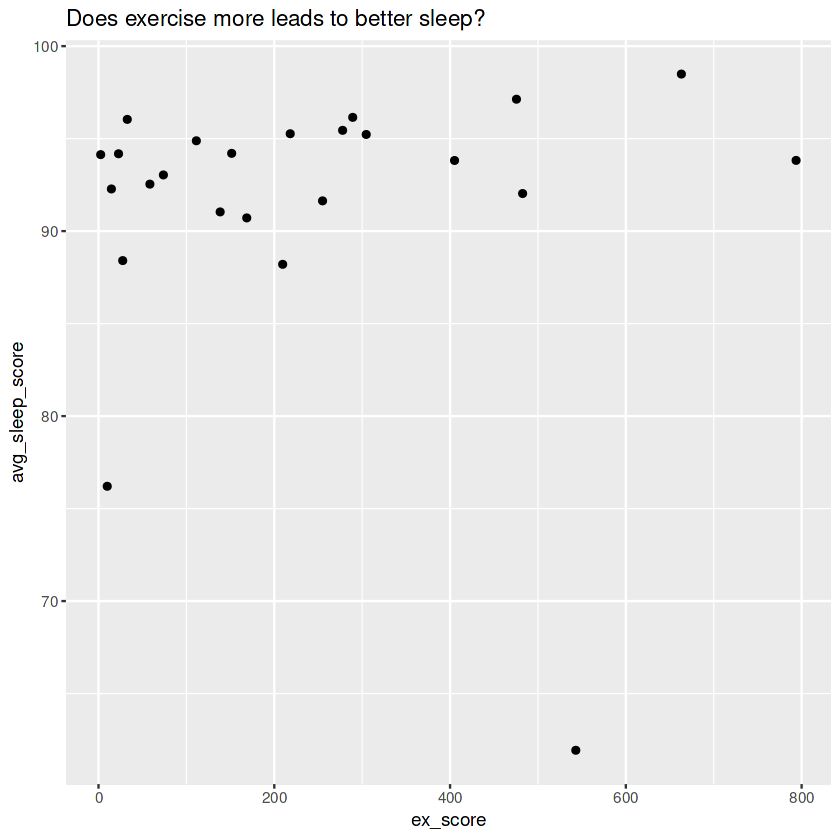

In [24]:
# Use ex_score vs sleep score
ex_score_vs_sleep_score <- users_ex_score %>%
    inner_join(sleep_score_by_users, by = c('Id' = 'Id')) %>%
    arrange(avg_sleep_score)

ggplot(data = ex_score_vs_sleep_score) +
    geom_point(mapping = aes(x = ex_score, y = avg_sleep_score )) + labs(title="Does exercise more leads to better sleep? ")


From the scatterplot above, we can see there are two outliers. The sleep score of this two users are below 80. In fact, for these outliers, Bellabeat app can suggest warnings about their sleep quality, suggesting methods and solutions to improve sleep quality of these users.

In the following, we will use the `rstatix::identify_outliers` function. This function use IQR method to detect outliers. The `adj_exscore_vs_sleep_score` dataframe will have the outliers filtered out

Id,ex_score,avg_sleep_score,is.outlier,is.extreme
<chr>,<dbl>,<dbl>,<lgl>,<lgl>
3977333714,543.064516,61.93415,TRUE,TRUE
1844505072,9.935484,76.20547,TRUE,TRUE


`geom_smooth()` using formula = 'y ~ x'



	Pearson's product-moment correlation

data:  adj_ex_score_vs_sleep_score$ex_score and adj_ex_score_vs_sleep_score$avg_sleep_score
t = 1.7371, df = 20, p-value = 0.09774
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07025351  0.67989767
sample estimates:
      cor 
0.3620795 



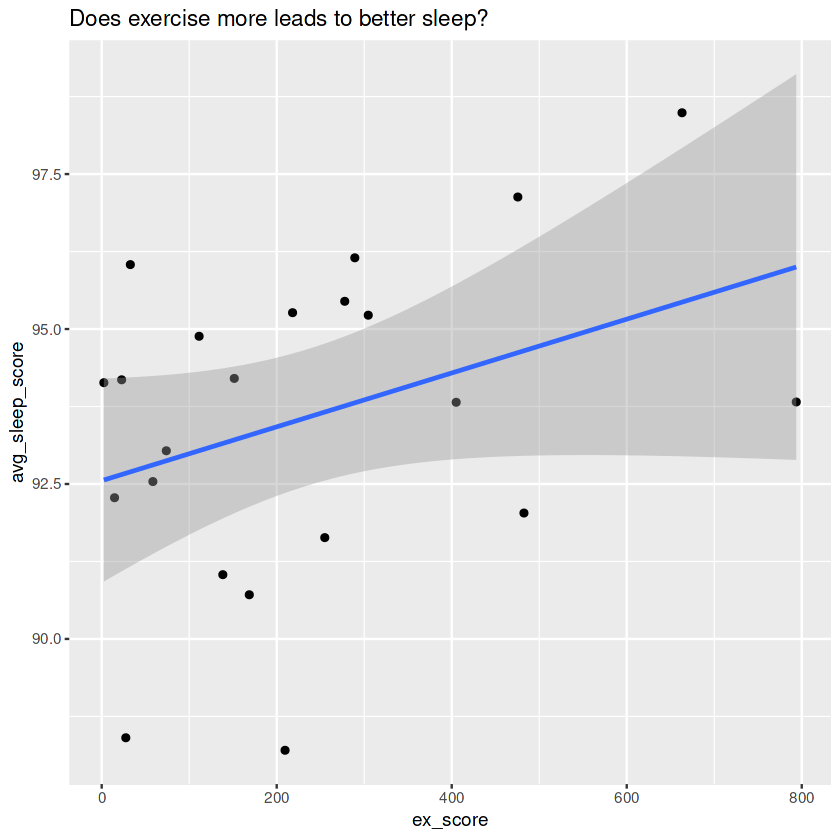

In [31]:
outliers <- ex_score_vs_sleep_score %>%
    rstatix::identify_outliers(avg_sleep_score)
#Get the details of the outliers
outliers

#Filter out the outliers
adj_ex_score_vs_sleep_score <- ex_score_vs_sleep_score %>%
    filter(! (ex_score_vs_sleep_score$Id %in% outliers$Id))

ggplot(data = adj_ex_score_vs_sleep_score) +
    geom_point(mapping = aes(x = ex_score, y = avg_sleep_score )) +
    geom_smooth(mapping = aes(x = ex_score, y = avg_sleep_score ), method = lm)+ 
    labs(title="Does exercise more leads to better sleep? ")

pearson_test = cor.test(adj_ex_score_vs_sleep_score$ex_score, adj_ex_score_vs_sleep_score$avg_sleep_score,
                        method = "pearson")

print(pearson_test)

A line of best fit is drawn on the sactterplot and it seemed to show that there is a positive correlation between exercise more and sleep quality. A pearson test was done on the relationship. r = 0.36, p-value = 0.098. The p-value is not small enough to call statistic significance (if using 0.05 as threshold), but this analysis suggest there is weak correlation and suggesting that a further study with larger sample might be worth it.

### Exercise and Sleep Length

From the sleepday dataframe, we can get the average sleeping length of the users. Let's see if there is a relationship between average sleep length and exercise amount.

Id,ex_score,avg_sleep_length_hr,is.outlier,is.extreme
<chr>,<dbl>,<dbl>,<lgl>,<lgl>
1844505072,9.935484,10.866667,TRUE,FALSE
2320127002,27.548387,1.016667,TRUE,FALSE
4558609924,168.677419,2.126667,TRUE,FALSE
7007744171,277.741935,1.141667,TRUE,FALSE


`geom_smooth()` using formula = 'y ~ x'



	Pearson's product-moment correlation

data:  adj_exscore_vs_sleeplen$ex_score and adj_exscore_vs_sleeplen$avg_sleep_length_hr
t = -1.448, df = 18, p-value = 0.1648
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6697824  0.1394590
sample estimates:
       cor 
-0.3229949 



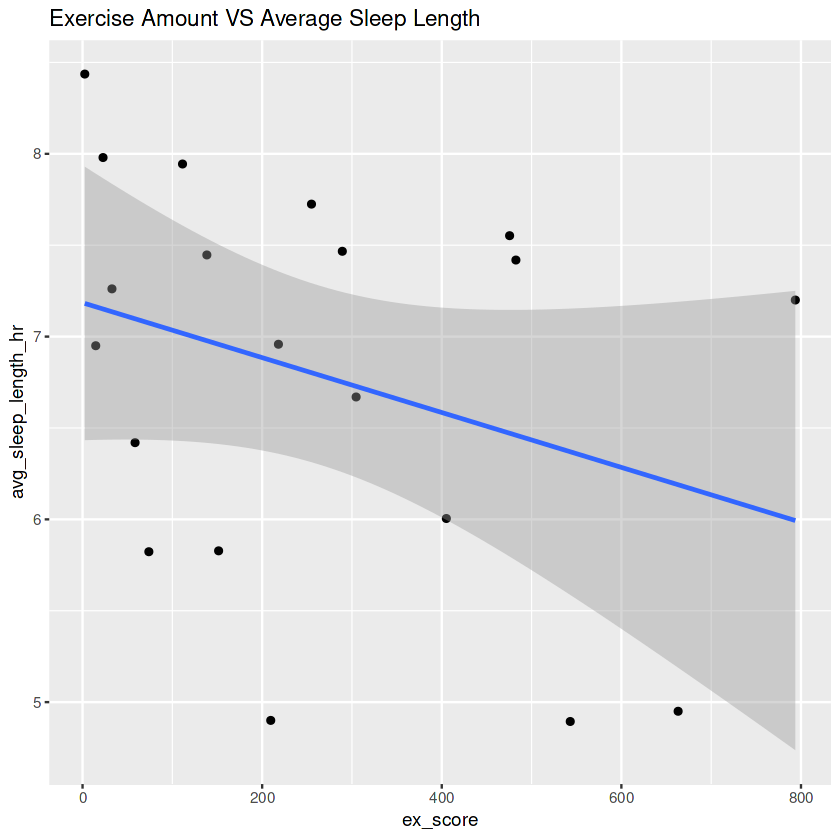

In [41]:

# Using SleepDay data 
users_avg_sleep_len <- sleepday_data %>%
    group_by(Id) %>%
    summarise(avg_sleep_length_hr = mean(TotalMinutesAsleep)/60)


exscore_vs_sleeplen <- users_ex_score  %>%
    inner_join(users_avg_sleep_len, by = c('Id' = 'Id')) 

# Again, we check for outliers
outliers <- exscore_vs_sleeplen %>%
    rstatix::identify_outliers(avg_sleep_length_hr)
outliers

adj_exscore_vs_sleeplen <- exscore_vs_sleeplen %>%
    filter(! (exscore_vs_sleeplen$Id %in% outliers$Id))


ggplot(data = adj_exscore_vs_sleeplen ) +
    geom_point(mapping = aes(x = ex_score, y = avg_sleep_length_hr ))+
    geom_smooth(mapping = aes(x = ex_score, y = avg_sleep_length_hr), method = lm) +
    labs(title = 'Exercise Amount VS Average Sleep Length')

pearson_test = cor.test(adj_exscore_vs_sleeplen$ex_score, adj_exscore_vs_sleeplen$avg_sleep_length_hr,
                        method = "pearson")

print(pearson_test)

Eventhough the line shown a weak negative correlation, the result is not significant with p-value = 0.1648

Let's see if exercising will have an effect on sleep length on the same day

In [29]:
sleep_len_by_night <- sleep_stages %>%
    group_by(Id,night) %>%
    summarise(user_sleep_len = sum(stage_duration)/60, .groups = 'drop')

sleep_len_vs_ex_len_each_day <- users_ex_len %>%
    inner_join(sleep_len_by_night, by = c("Id" = "Id", "ActivityDate" = "night"))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'



	Pearson's product-moment correlation

data:  sleep_len_vs_ex_len_each_day$ex_len and sleep_len_vs_ex_len_each_day$user_sleep_len
t = -0.75153, df = 398, p-value = 0.4528
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.13519664  0.06063158
sample estimates:
        cor 
-0.03764394 



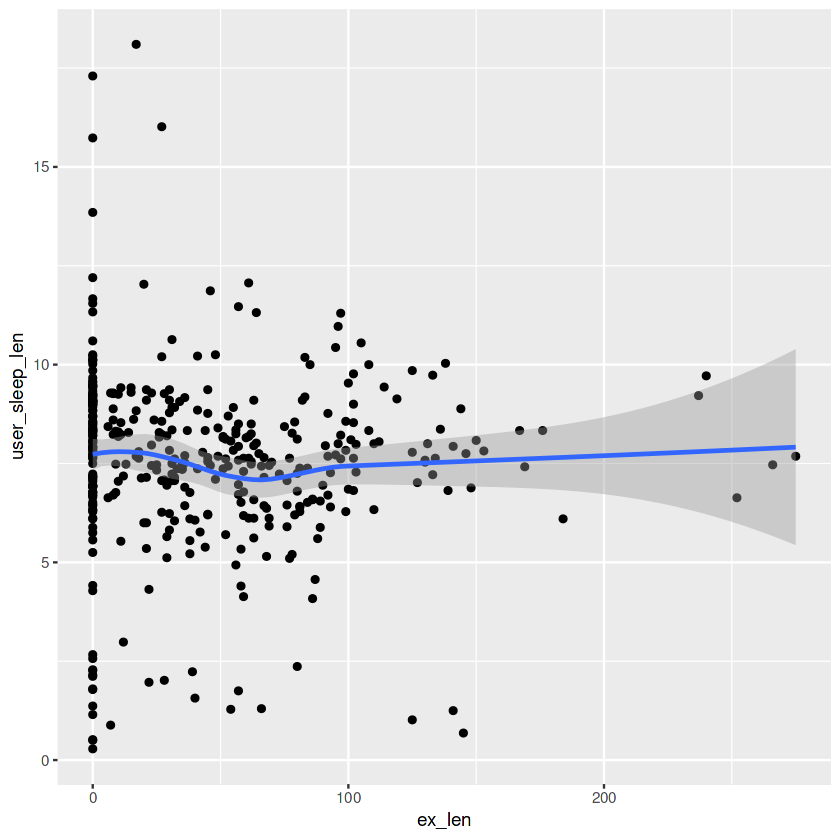

In [30]:
ggplot(data = sleep_len_vs_ex_len_each_day) +
    geom_point(mapping = aes(x = ex_len, y = user_sleep_len ))+
    geom_smooth(mapping = aes(x = ex_len, y = user_sleep_len ))

pearson_test = cor.test(sleep_len_vs_ex_len_each_day$ex_len, sleep_len_vs_ex_len_each_day$user_sleep_len,
                        method = "pearson")

print(pearson_test)

As the analysis show, the correlation is pretty low and p-value = 0.45 is high. This could suggest there is no correlation between exercise length and sleep on the same day.

### Assumptions Used

1. Each unique Id represent a unique users of the device. This would make the no of users in the second period be 33, ignoring the stated number of 30 users in the data source.
2. Both VeryActiveMinutes and FailyActiveMinutes can be considered as exercise time length

## Conclusion

1. The analysis above suggest that exercise more can improve sleep quality, but this conclusion migh need more evidence to support. A further study involving more users might be useful. For Bellabeat, they could try to use their devices to conduct the further study, and if it shows exercise more can improve sleep quality, Bellabeat could suggest more exercise time for people wanting to improve their sleep quality.

2. Bellabeat could also try to classify people sleeping states and obtain a sleep score for the users. For people with low sleep scores, the Bellabeat app can try to suggest methods other than exercise to help users' sleeping problems.

3. The analysis did not find evidence that more exercising can improve sleeping length, this might suggest if Bellabeat wants to improve people sleeping time, other methods such as meditation or sleep time prompt might be more useful, but that would need another analysis to prove if such methods are effective.
